In [82]:
import numpy as np
import matplotlib.pyplot as plt
import coordinate_transforms
import decorr_calculations
import plotting
import importlib

importlib.reload(decorr_calculations)
importlib.reload(coordinate_transforms)
importlib.reload(plotting)

import sys
sys.path.append("/Users/ruby/Astro/PSsensitivity")
import array_sensitivity

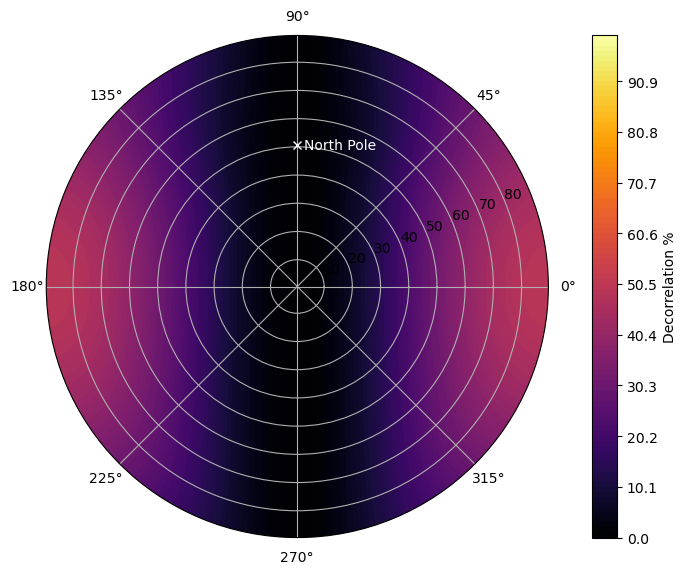

In [83]:
# Calculate frequency decorrelation for a single baseline

bl_length = 15000
bl_orientation = 0
telescope_lat_deg = 39.25

bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

decorr_values = decorr_calculations.decorr_general(
    total_time_interval_s=0,
    n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
    freq_resolution_hz=12000,
    freq_hz=300 * 1e6,
    bl_ew_extent_m=bl_ew_extent_m,
    bl_ns_extent_m=bl_ns_extent_m,
    source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
    source_dec_deg=dec_vals,
    phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
    phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
    telescope_lat_deg=telescope_lat_deg,
    use_approximation=True,
)

plotting.polar_contour_plot(
    (1 - np.abs(decorr_values)) * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title="",
    show=True,
    mark_north_pole=True,
)

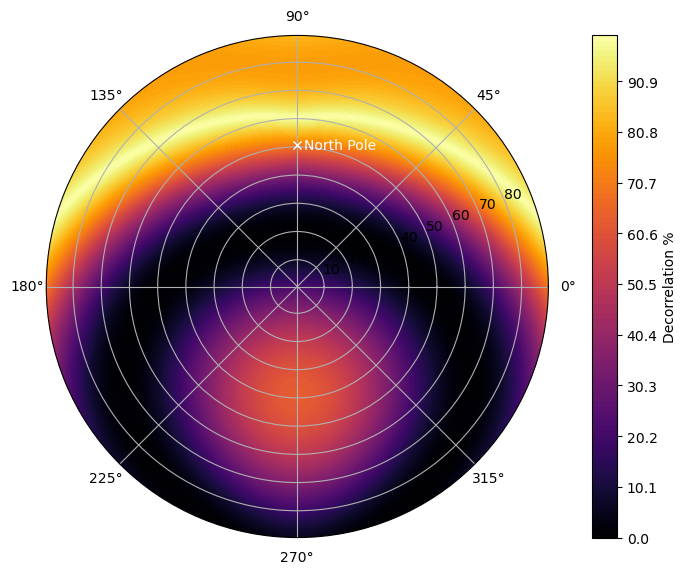

In [84]:
# Calculate time decorrelation for a single baseline

bl_length = 20000
bl_orientation = 0
telescope_lat_deg = 39.25

bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

decorr_values = decorr_calculations.decorr_general(
    total_time_interval_s=1,
    n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
    freq_resolution_hz=0,
    freq_hz=300 * 1e6,
    bl_ew_extent_m=bl_ew_extent_m,
    bl_ns_extent_m=bl_ns_extent_m,
    source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
    source_dec_deg=dec_vals,
    phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
    phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
    telescope_lat_deg=telescope_lat_deg,
    use_approximation=True,
)

plotting.polar_contour_plot(
    (1 - np.abs(decorr_values)) * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title="",
    show=True,
    mark_north_pole=True,
)

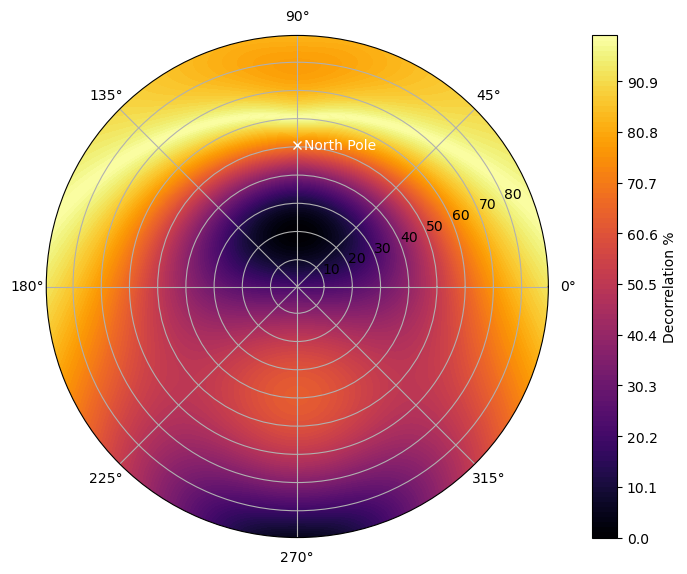

In [85]:
# Calculate time and frequency decorrelation for a single baseline

bl_length = 20000
bl_orientation = 0
telescope_lat_deg = 39.25

bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

decorr_values = decorr_calculations.decorr_general(
    total_time_interval_s=1,
    n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
    freq_resolution_hz=12000,
    freq_hz=300 * 1e6,
    bl_ew_extent_m=bl_ew_extent_m,
    bl_ns_extent_m=bl_ns_extent_m,
    source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
    source_dec_deg=dec_vals,
    phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
    phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
    telescope_lat_deg=telescope_lat_deg,
    use_approximation=True,
)

plotting.polar_contour_plot(
    (1 - np.abs(decorr_values)) * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title="",
    show=True,
    mark_north_pole=True,
)

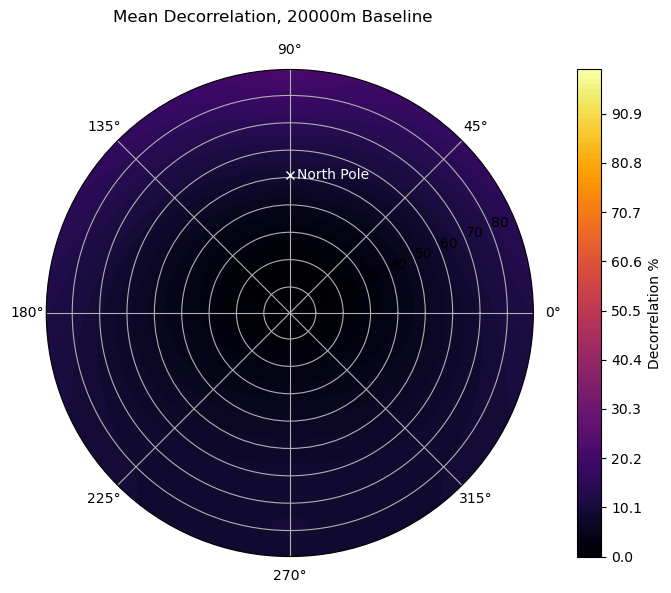

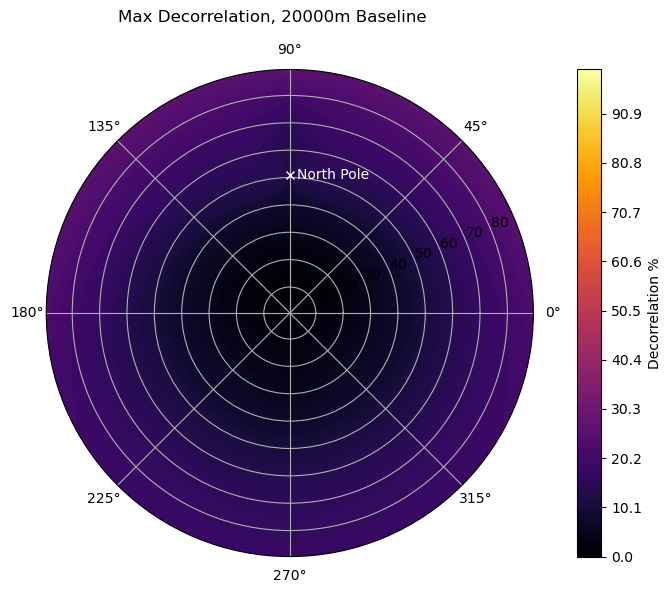

Maximum sensitivity loss: 0.1486782734519827
Maximum decorrelation: 0.19211652041548866


In [96]:
# Iterate over baseline orientations

bl_length = 20000
bl_orientations = np.arange(0, 180, 1)
telescope_lat_deg = 39.25

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

decorr_values = np.zeros((len(za_vals), len(az_vals), len(bl_orientations)), dtype=float)
for bl_orient_ind, bl_orientation in enumerate(bl_orientations):
    bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
    bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

    decorr_values[:, :, bl_orient_ind] = decorr_calculations.decorr_general(
        total_time_interval_s=0.25,
        n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
        freq_resolution_hz=5000,
        freq_hz=300 * 1e6,
        bl_ew_extent_m=bl_ew_extent_m,
        bl_ns_extent_m=bl_ns_extent_m,
        source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
        source_dec_deg=dec_vals,
        phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
        phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
        telescope_lat_deg=telescope_lat_deg,
        use_approximation=True,
    )
mean_decorr = np.mean(1 - np.abs(decorr_values), axis=2)
max_decorr = np.max(1 - np.abs(decorr_values), axis=2)
plotting.polar_contour_plot(
    mean_decorr * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title=f"Mean Decorrelation, {bl_length}m Baseline",
    show=True,
    mark_north_pole=True,
)
plotting.polar_contour_plot(
    max_decorr * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title=f"Max Decorrelation, {bl_length}m Baseline",
    show=True,
    mark_north_pole=True,
)

fov_cutoff_deg = 70
keep_inds = np.where(za_array < fov_cutoff_deg)
print(f"Maximum sensitivity loss: {np.max(mean_decorr[keep_inds])}")
print(f"Maximum decorrelation: {np.max(max_decorr[keep_inds])}")

### Iterate Over Baseline Lengths

In [87]:
# Get baseline lengths
antpos_filepath = "dsa1650_P305_v2.4.6_antenna_config.txt"
antpos = array_sensitivity.get_antpos_from_txt(antpos_filepath)
baselines_m = array_sensitivity.get_baselines(antpos)
bl_lengths = np.sqrt(np.sum(baselines_m**2.0, axis=1))

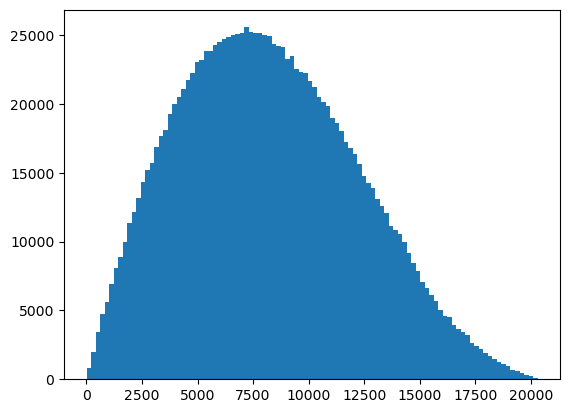

In [88]:
plt.hist(bl_lengths, bins=100)
plt.show()

In [89]:
hist_value, bin_edges = np.histogram(bl_lengths, bins=100)

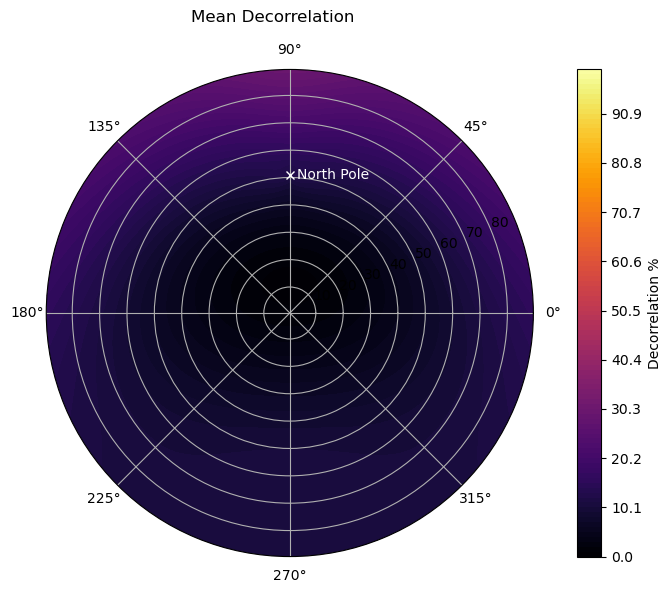

Maximum sensitivity loss: 0.20724068456399897


In [108]:
# Iterate over baseline orientations

bl_lengths = (bin_edges[1:] + bin_edges[:-1]) / 2
bl_orientations = np.arange(0, 180, 1)
telescope_lat_deg = 39.25

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

decorr_values = np.zeros(
    (len(za_vals), len(az_vals), len(bl_lengths), len(bl_orientations)), dtype=float
)
for bl_length_ind, bl_length in enumerate(bl_lengths):
    for bl_orient_ind, bl_orientation in enumerate(bl_orientations):
        bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
        bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

        decorr_values[:, :, bl_length_ind, bl_orient_ind] = (
            decorr_calculations.decorr_general(
                total_time_interval_s=0.75,
                n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
                freq_resolution_hz=12000,
                freq_hz=300 * 1e6,
                bl_ew_extent_m=bl_ew_extent_m,
                bl_ns_extent_m=bl_ns_extent_m,
                source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
                source_dec_deg=dec_vals,
                phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
                phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
                telescope_lat_deg=telescope_lat_deg,
                use_approximation=True,
            )
        )
mean_decorr = np.mean(1 - np.abs(decorr_values), axis=3)  # Average over baseline orientations
max_decorr = np.mean(
    1 - np.abs(decorr_values), axis=3
)  # Maximum across baseline orientations
mean_decorr = np.sum(mean_decorr * hist_value[np.newaxis, np.newaxis, :], axis=2) / np.sum(hist_value)  # Calculate weighted average over baseline lengths

plotting.polar_contour_plot(
    mean_decorr * 100,  # Convert to percentage
    np.deg2rad(az_vals),  # Units radians
    za_vals,  # Units degrees
    vmin=0,
    vmax=100,
    ncontours=100,
    title=f"Mean Decorrelation",
    show=True,
    mark_north_pole=True,
)

fov_cutoff_deg = 70
keep_inds = np.where(za_array < fov_cutoff_deg)
print(f"Maximum sensitivity loss: {np.max(mean_decorr[keep_inds])}")

### Iterate Over Resolution and Baseline Length

In [ ]:
# Iterate over baseline orientations

bl_lengths = (bin_edges[1:] + bin_edges[:-1]) / 2
bl_orientations = np.arange(0, 180, 1)
time_intervals = np.arange(.25, 2, 0.25)
freq_resolutions = np.arange(5e3, 20e3, 1e3)
telescope_lat_deg = 39.25

za_vals = np.arange(0, 90, 1) + 0.5
az_vals = np.arange(0, 370, 1) + 0.5
az_array, za_array = np.meshgrid(az_vals, za_vals)
ra_vals, dec_vals = coordinate_transforms.az_za_to_ra_dec(
    az_array,  # Units degrees
    za_array,  # Units degrees
    0,  # Units hours (RA of zenith)
    telescope_lat_deg,  # Units degrees
)

fov_cutoff_deg = 70
keep_inds = np.where(za_array < fov_cutoff_deg)

max_decorr = np.zeros((len(time_intervals), len(freq_resolutions), len(bl_lengths)), dtype=float)
for time_int_ind, time_interval in enumerate(time_intervals):
    for freq_res_ind, freq_resolution in enumerate(freq_resolutions):
        for bl_length_ind, bl_length in enumerate(bl_lengths):
            decorr_values = np.zeros(
                (
                    len(za_vals),
                    len(az_vals),
                    len(bl_orientations),
                ),
                dtype=float,
            )
            for bl_orient_ind, bl_orientation in enumerate(bl_orientations):
                bl_ew_extent_m = bl_length * np.cos(np.radians(bl_orientation))
                bl_ns_extent_m = bl_length * np.sin(np.radians(bl_orientation))

                decorr_values[:, :, bl_orient_ind] = (
                    decorr_calculations.decorr_general(
                        total_time_interval_s=0.75,
                        n_time_steps=np.inf,  # Integer. If 1, assumes no phase tracking; if infinity assumes continuous phase tracking.
                        freq_resolution_hz=12000,
                        freq_hz=300 * 1e6,
                        bl_ew_extent_m=bl_ew_extent_m,
                        bl_ns_extent_m=bl_ns_extent_m,
                        source_ra_offset_hr=ra_vals,  # Difference between zenith and source RAs
                        source_dec_deg=dec_vals,
                        phase_center_ra_offset_hr=0,  # Used only if n_time_steps > 1
                        phase_center_dec_deg=58.67923353522443,  # Used only if n_time_steps > 1
                        telescope_lat_deg=telescope_lat_deg,
                        use_approximation=True,
                    )
                )
            max_decorr_new = np.max(
                1 - np.abs(decorr_values), axis=2
            )  # Maximum across baseline orientations
            max_decorr[time_int_ind, freq_res_ind, bl_length_ind] = np.max(
                max_decorr_new[keep_inds]
            )